### Read power and temperature traces

In [11]:
# Read power trace
power = []
with open('power.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        data = line.strip().split(',')
        data = [float(d) for d in data]
        power.append(data)

# Read temperature trace
temp = []
with open('temp.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        data = line.strip().split(',')
        data = [float(d) for d in data]
        temp.append(data)

import numpy as np
pwr_array = np.array(power)
temp_array = np.array(temp)
print(pwr_array.shape, temp_array.shape)

(800, 2) (800, 2)


### Plot power and temperature traces into one figure

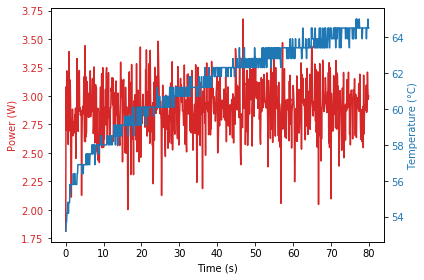

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Power (W)', color=color)
ax1.plot(pwr_array[:, 0], pwr_array[:, 1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Temperature (°C)', color=color) # we already handled the x-label with ax1
ax2.plot(temp_array[:, 0], temp_array[:, 1], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.savefig("pwr_temp.png", dpi=200)
plt.show()

### Read time measurements and compute average time

In [13]:
def read_time(file_name):
    execT = {}
    delayT = {}
    commT = {}
    with open(file_name, 'r') as f:
        lines = f.readlines()
        for line in lines:
            data = line.strip().split(',')
            data_size = int(data[0])
            exec_time = float(data[1])
            delay_time = float(data[2])
            comm_time = float(data[3])
            if data_size in execT:
                execT[data_size].append(exec_time)
                delayT[data_size].append(delay_time)
                commT[data_size].append(comm_time)
            else:
                execT[data_size] = [exec_time]
                delayT[data_size] = [delay_time]
                commT[data_size] = [comm_time]
        
        ret = []
        for key in execT:
            item = [key, sum(execT[key])/len(execT[key]), sum(delayT[key])/len(delayT[key]), 
                    sum(commT[key])/len(commT[key])]
            ret.append(item)
    return ret

badnet_comp = np.array(read_time("./log-badnet-comp.txt"))
goodnet_comp = np.array(read_time("./log-goodnet-comp.txt"))
badnet_send = np.array(read_time("./log-badnet-send.txt"))
goodnet_send = np.array(read_time("./log-goodnet-comp.txt"))

### Plot delay time in bad network condition

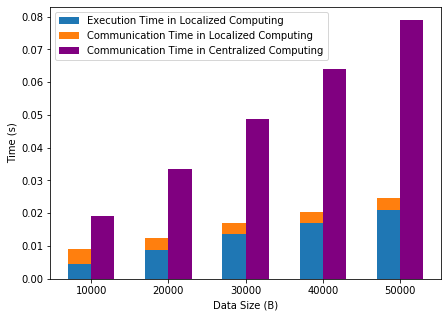

In [14]:
idx = badnet_comp[:, 0]
width = 3000
dummyData = np.zeros((idx.size,))

plt.figure(figsize=(7,5))
# Under badnet condition, if compute locally
p_badnet_comp_1 = plt.bar(idx-width/2, badnet_comp[:, 1], width) # execution time
p_badnet_comp_2 = plt.bar(idx-width/2, badnet_comp[:, 3], width, # communication time
             bottom=badnet_comp[:, 1])
p_badnet_send_1 = plt.bar(idx+width/2, dummyData, width) # execution time - should be zero
p_badnet_send_2 = plt.bar(idx+width/2, badnet_send[:, 3], width, # communication time
             bottom=dummyData, color='purple')

plt.xlabel('Data Size (B)')
plt.ylabel('Time (s)')
# plt.title('Delay Time Decomposition in Bad Network Condition (6Mbps)')
plt.legend((p_badnet_comp_1[0], p_badnet_comp_2[0], p_badnet_send_2), 
           ('Execution Time in Localized Computing', \
            'Communication Time in Localized Computing', \
            'Communication Time in Centralized Computing'))

plt.savefig('badnet.png', dpi=200)
plt.show()

### Plot delay time in good network condition

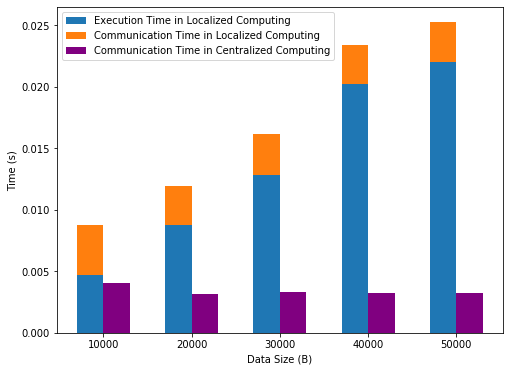

In [15]:
idx = goodnet_comp[:, 0]
width = 3000
dummyData = np.zeros((idx.size,))

plt.figure(figsize=(8,6))
# Under badnet condition, if compute locally
p_goodnet_comp_1 = plt.bar(idx-width/2, goodnet_comp[:, 1], width) # execution time
p_goodnet_comp_2 = plt.bar(idx-width/2, goodnet_comp[:, 3], width, # communication time
             bottom=goodnet_comp[:, 1])
p_goodnet_send_1 = plt.bar(idx+width/2, dummyData, width) # execution time - should be zero
p_goodnet_send_2 = plt.bar(idx+width/2, goodnet_send[:, 3], width, # communication time
             bottom=dummyData, color='purple')

plt.xlabel('Data Size (B)')
plt.ylabel('Time (s)')
# plt.title('Delay Time Decomposition in Good Network Condition (54Mbps)')
plt.legend((p_goodnet_comp_1[0], p_goodnet_comp_2[0], p_goodnet_send_2), 
           ('Execution Time in Localized Computing', \
            'Communication Time in Localized Computing', \
            'Communication Time in Centralized Computing'))

plt.savefig('goodnet.png', dpi=200)
plt.show()